# Logistic Regression

Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class (e.g.,
what is the probability that this email is spam?). If the estimated probability is greater
than 50%, then the model predicts that the instance belongs to that class (called the
positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). This makes it a binary classifier.

## Estimating Probabilities
So how does Logistic Regression work? Just like a Linear Regression model, a Logistic
Regression model computes a weighted sum of the input features (plus a bias term),
but instead of outputting the result directly like the Linear Regression model does, it
outputs the logistic of this result

### Logistic Regression model estimated probability (vectorized form)

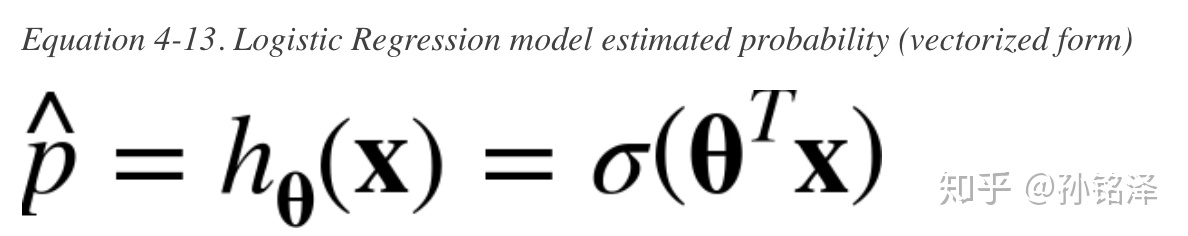

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1.

### Logistic function
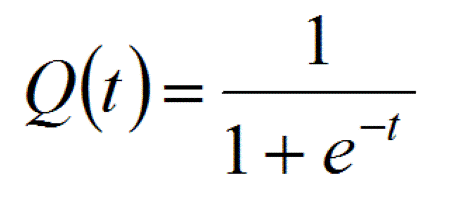

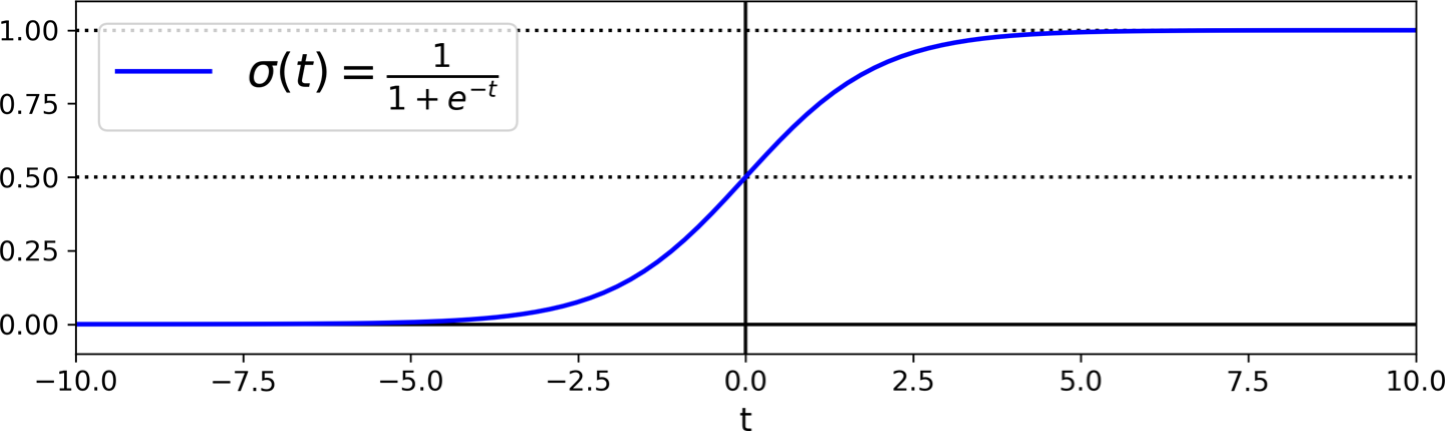
Once the Logistic Regression model has estimated the probability p = hθ(x) that an
instance x belongs to the positive class, it can make its prediction ŷ easily

### Logistic Regression model predictio
y =

{0 if p < 0.5
 
1 if p ≥ 0.5 }

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if x⊺ θ is positive and 0 if it is negative.

## Note 

The score t is often called the logit. The name comes from the fact
that the logit function, defined as logit(p) = log(p / (1 – p)), is the
inverse of the logistic function. Indeed, if you compute the logit of
the estimated probability p, you will find that the result is t. The
logit is also called the log-odds, since it is the log of the ratio
between the estimated probability for the positive class and the
estimated probability for the negative class.

## Training and Cost Function

Now you know how a Logistic Regression model estimates probabilities and makes
predictions. But how is it trained? The objective of training is to set the parameter
vector θ so that the model estimates high probabilities for positive instances (y = 1)
and low probabilities for negative instances (y = 0). This idea is captured by the cost
function shown in Equation  for a single training instance x.

## Cost function of a single training instance
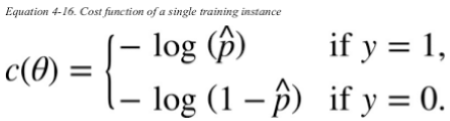
## Logistic Regression cost function (log loss)
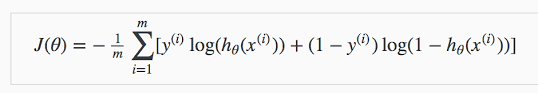
The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
The good news is that this cost function is convex, so Gradient Descent (or any other
optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).


# Logistic cost function partial derivatives
The partial derivatives of the cost
function with regard to the jth model parameter θj are given by

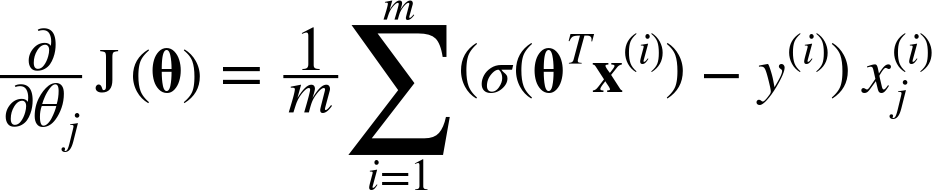

This equation looks very much like Equation 4-5: for each instance it computes the
prediction error and multiplies it by the jth feature value, and then it computes the
average over all training instances. Once you have the gradient vector containing all
the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you
would take one instance at a time, and for Mini-batch GD you would use a minibatch
at a time.

### Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data

In [92]:
from sklearn.datasets import load_iris

In [93]:
iris = load_iris()

In [94]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [95]:
x=iris["data"]

In [96]:
import numpy as np
y = (iris["target"] == 2).astype(np.int)
# 1 if Iris virginica, else 0

In [97]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2,random_state =42)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [102]:
y_proba = log_reg.predict_proba(X_val)

In [105]:
y_proba

array([[8.00397233e-01, 1.99602767e-01],
       [9.99994298e-01, 5.70191129e-06],
       [1.46618716e-03, 9.98533813e-01],
       [7.92994822e-01, 2.07005178e-01],
       [7.24310548e-01, 2.75689452e-01],
       [9.99994189e-01, 5.81098859e-06],
       [9.83803900e-01, 1.61961003e-02],
       [1.79777747e-01, 8.20222253e-01],
       [7.27790745e-01, 2.72209255e-01],
       [9.68745254e-01, 3.12547458e-02],
       [2.71802384e-01, 7.28197616e-01],
       [9.99996183e-01, 3.81722513e-06],
       [9.99998015e-01, 1.98469717e-06],
       [9.99995445e-01, 4.55483771e-06],
       [9.99995871e-01, 4.12878974e-06],
       [7.20132739e-01, 2.79867261e-01],
       [3.00761374e-02, 9.69923863e-01],
       [9.68918870e-01, 3.10811299e-02],
       [8.29329876e-01, 1.70670124e-01],
       [4.38859789e-02, 9.56114021e-01],
       [9.99992477e-01, 7.52261030e-06],
       [4.27269541e-01, 5.72730459e-01],
       [9.99991036e-01, 8.96423650e-06],
       [5.35130708e-02, 9.46486929e-01],
       [2.458643

In [106]:
y_val_predict = log_reg.predict(X_val)

In [107]:
y_val_predict

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

# Note
Just like the other linear models, Logistic Regression models can be regularized using
ℓ1 or ℓ2 penalties. Scikit-Learn actually adds an ℓ2 penalty by default.

## Note 

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers . This is called Softmax Regression, or Multinomial Logistic Regression.

### Softmax score for class k
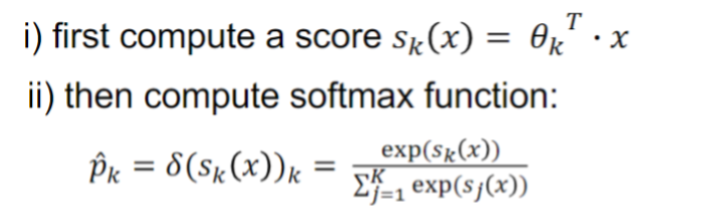
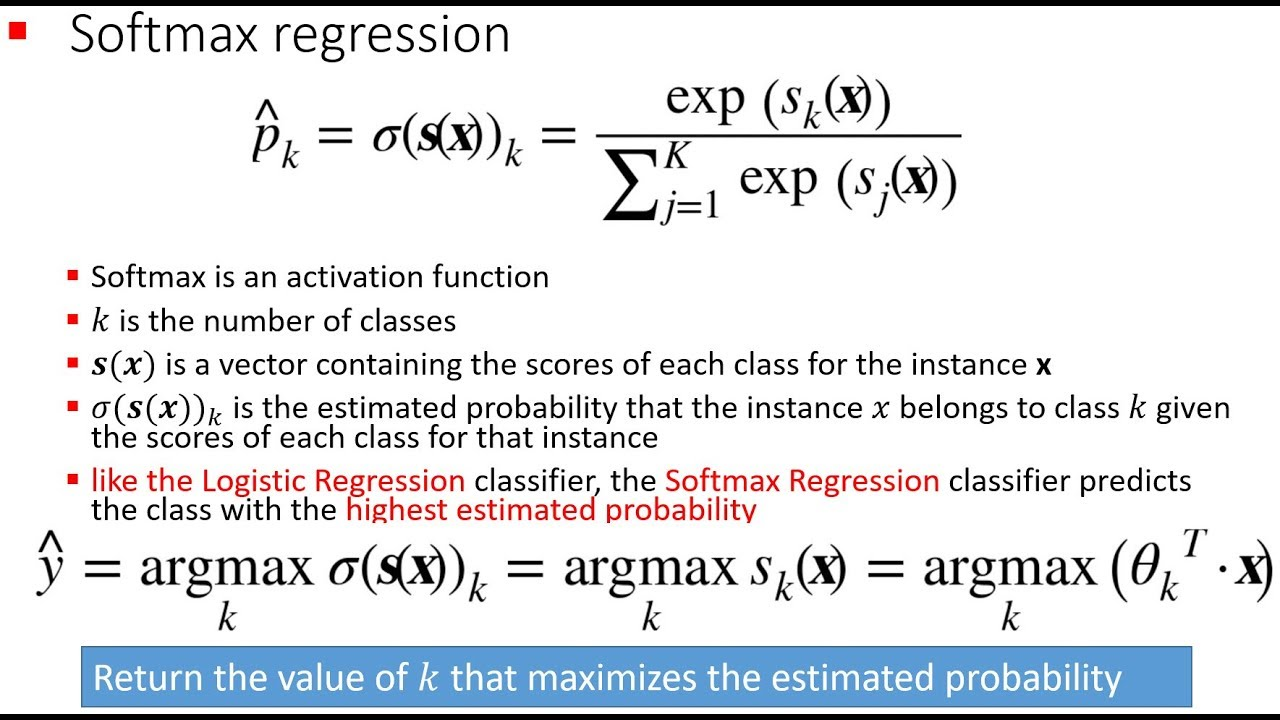

### Note 
The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput), so it should be used only
with mutually exclusive classes, such as different types of plants.
You cannot use it to recognize multiple people in one picture.

## Cross entropy cost function
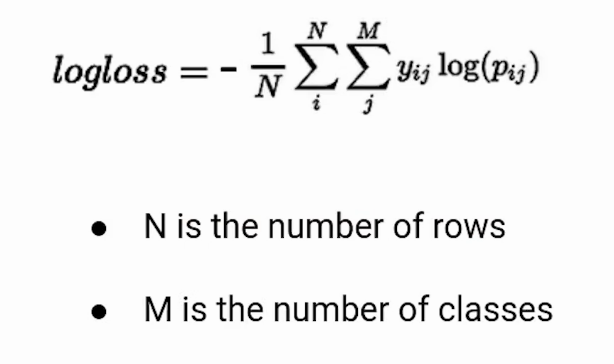
• yij is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not
## Cross entropy gradient vector for class k
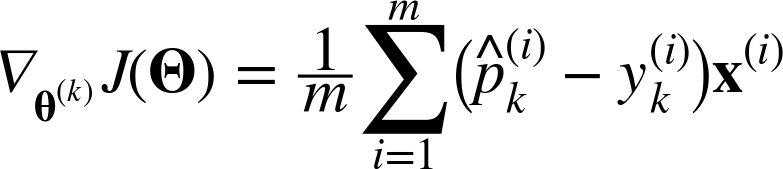

In [131]:
X = iris["data"]
y = iris["target"]

In [132]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
softmax_reg = LogisticRegression(multi_class= 'multinomial' ,
                                 solver= 'lbfgs', C=10)

In [135]:
softmax_reg.fit(X_train, y_train)

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [136]:
y_val_predict = softmax_reg.predict(X_val)

In [139]:
y_val_predict[0] 

0

In [142]:
from sklearn.metrics import classification_report

In [145]:
classification_report(y_val , y_val_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [147]:
y_val_predict_p=softmax_reg.predict_proba(X_val)

In [148]:
y_val_predict_p[0]

array([9.97533619e-01, 2.46638119e-03, 2.13281584e-14])

In [149]:
from sklearn.metrics import log_loss

In [152]:
log_loss(y_val , y_val_predict_p)

0.03658143468509797